In [24]:
import json
from collections import defaultdict

import aemeasure
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load experiment data

In [25]:
experiment_table = aemeasure.read_as_pandas_table("results/be_smart_30it_60sec")
experiment_table

,heur,start_sol,heur_time,n_concrete,instance,time_limit,iterations,cds_optimize_stop,cds_found_solution_size,cds_proven_optimal,...,stdout,stderr,timestamp,hostname,argv,git_revision,python_env,cwd,heur_stats,cds_iter_stop
0,fix single edge,[],4.768372e-07,20,toybox-case-study-2007-05-17_02-38-27,60.0,30,[],[],[],...,,,2023-03-08T05:20:31.609327,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,None,None
1,node heuristic (10 iterations),"[[-18, -8], [18, -8], [-2, -5], [2, -5], [-20,...",2.716208e-02,20,toybox-case-study-2007-05-17_02-38-27,60.0,30,[],[],[],...,,,2023-03-08T05:20:56.331968,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,"[{'iter_stop': 1678249253111, 'optimize_stop':...",None
2,node heuristic (10 iterations),"[[93, 286], [238, 286], [334, 286], [408, 286]...",2.425389e+02,711,busybox-case_study-2011-04-16_18-07-35,60.0,30,"[1678251473383, 1678251473410, 1678251473434, ...","[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,,,2023-03-08T06:07:29.481692,algry02,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,"[{'iter_stop': 1678251253344, 'optimize_stop':...","[1678251473383, 1678251473410, 1678251473434, ..."
3,fix single edge,[],1.907349e-06,234,uclibc-case-study-2016-11-29_08-38-20,60.0,30,"[1678247745664, 1678247746830, 1678247746957, ...","[45, 77, 102, 119, 139, 139, 151, 188, 205, 22...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,,,2023-03-08T05:06:04.256440,algry03,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,None,"[1678247745664, 1678247746830, 1678247746957, ..."
4,node heuristic (1 iterations),"[[69, -679], [198, -679], [292, -679], [517, -...",2.392636e+01,831,busybox-case_study-2017-08-03_03-46-14,60.0,30,"[1678251310200, 1678251310486, 1678251310536, ...","[10, 11, 11, 11, 11, 11, 10, 12, 12, 12, 12, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,,,2023-03-08T06:05:02.125870,algry03,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,"[{'iter_stop': 1678251301001, 'optimize_stop':...","[1678251310200, 1678251310486, 1678251310536, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,node heuristic (10 iterations),"[[-90, 145], [108, 145], [237, 145], [122, 55]...",1.949597e+01,248,fiasco-case-study-2020-04-14_11-39-31,60.0,30,"[1678249267356, 1678249268068, 1678249268771, ...","[182, 182, 182, 182, 182, 182, 182, 182, 182, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,,,2023-03-08T05:30:01.073608,algry03,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggehrke/git/software-configurat...,"[{'iter_stop': 1678249256303, 'optimize_stop':...","[1678249267356, 1678249268068, 1678249268771, ..."
252,fix single edge,[],7.152557e-07,102,toybox-case-study-2019-03-10_23-00-19,60.0,30,"[1678256025903, 1678256025924, 1678256029595, ...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,,,2023-03-08T07:25:36.451474,algry03,/ibr/home/ggehrke/anaconda3/envs/quantum/lib/p...,1ac95b6e01b3bda4c99d826b3bef9327e47bae09,"[{'name': 'networkx', 'path': '/misc/ibr/home/...",/misc/ibr/home/ggeh

In [26]:
# Load reference data

best_ubs = {}

with open("lower_bounds_candp.json") as f:
    best_ubs = json.load(f)

best_ubs

{'busybox-case_study-2010-04-18_22-09-30': 21,
 'uclibc-case-study-2010-09-15_12-31-22': 512,
 'busybox-case_study-2010-01-20_02-47-37': 21,
 'busybox-case_study-2008-07-19_09-27-19': 27,
 'soletta-case-study-2016-06-02_14-58-43': 37,
 'soletta-case-study-2015-07-06_15-16-16': 16,
 'busybox-case_study-2008-05-27_08-41-32': 24,
 'busybox-case_study-2008-11-22_18-41-41': 24,
 'uclibc-case-study-2008-10-27_22-02-54': 512,
 'toybox-case-study-2007-11-27_00-57-42': 8,
 'uclibc-case-study-2016-11-27_22-32-11': 310,
 'busybox-case_study-2009-12-07_01-37-34': 21,
 'busybox-case_study-2008-04-22_00-16-29': 24,
 'busybox-case_study-2009-06-18_19-59-51': 24,
 'soletta-case-study-2015-09-02_17-37-27': 30,
 'soletta-case-study-2015-12-28_13-48-28': 30,
 'busybox-case_study-2008-08-22_08-25-26': 27,
 'uclibc-case-study-2016-12-23_07-53-31': 310,
 'soletta-case-study-2016-01-29_14-02-27': 30,
 'busybox-case_study-2008-01-05_03-26-41': 25,
 'busybox-case_study-2008-11-07_01-12-16': 24,
 'soletta-case-

# Create and export Plots

In [27]:
sns.set_theme()

In [28]:
datapoints = []
interp_data = defaultdict(lambda: defaultdict(list))

for instance in experiment_table["instance"].unique():
    category = instance.split("-")[0]
    rows = experiment_table[experiment_table["instance"] == instance]

    for _index, row in rows.iterrows():
        if len(row["cds_global_lb"]) == 0:
            print(f"Warning: Entry with empty lists skipped {row['instance']}")
            continue

        heur_type = row["heur"]
        if heur_type == "fix single edge":
            heur_type = "single LNS iteration"

        x = []
        y = []
        for i, (score, tstop, tstart) in enumerate(
            zip(row["cds_global_lb"], row["cds_iter_stop"], row["cds_iter_start"])
        ):
            y.append(100.0 * score / best_ubs[instance])
            dt = (tstop - tstart) / 1000.0
            x.append(sum(x) + dt)
        x = [x_ + row["heur_time"] for x_ in x]
        interp_data[category][heur_type].append((x, y))

        i = 0

        for (
            global_lb,
            _lb,
            _iter_start,
            _iter_stop,
            _nbhd_start,
            _nbhd_stop,
            _nbhd_size,
        ) in zip(
            row["cds_global_lb"],
            row["cds_found_solution_size"],
            row["cds_iter_start"],
            row["cds_iter_stop"],
            row["cds_nbhd_start"],
            row["cds_nbhd_stop"],
            row["cds_nbhd_free_size"],
        ):
            d = {}
            d["instance"] = instance
            d["category"] = category
            d["n_concrete"] = row["n_concrete"]
            d["heur"] = heur_type
            if heur_type == "fix single edge":
                d["heur score"] = (row["cds_global_lb"][0] / best_ubs[instance]) * 100.0
                d["heur time"] = (
                    row["cds_iter_stop"][0] - row["cds_iter_start"][0]
                ) / 1000.0
            else:
                d["heur score"] = 100.0 * (
                    max(1, len(row["start_sol"])) / best_ubs[instance]
                )
                d["heur time"] = row["heur_time"]
            d["iteration"] = i
            d["time in seconds"] = (
                row["heur_time"]
                + sum(
                    row["cds_iter_stop"][j] - row["cds_iter_start"][j]
                    for j in range(0, i)
                )
                / 1000.0
            )
            d["cds score (% of best known)"] = 100.0 * (global_lb / best_ubs[instance])

            datapoints.append(d)
            i += 1

In [29]:
data = pd.DataFrame(data=datapoints)
data

,instance,category,n_concrete,heur,heur score,heur time,iteration,time in seconds,cds score (% of best known)
0,busybox-case_study-2011-04-16_18-07-35,busybox,711,node heuristic (10 iterations),78.260870,242.538928,0,242.538928,100.0
1,busybox-case_study-2011-04-16_18-07-35,busybox,711,node heuristic (10 iterations),78.260870,242.538928,1,242.752928,100.0
2,busybox-case_study-2011-04-16_18-07-35,busybox,711,node heuristic (10 iterations),78.260870,242.538928,2,242.779928,100.0
3,busybox-case_study-2011-04-16_18-07-35,busybox,711,node heuristic (10 iterations),78.260870,242.538928,3,242.803928,100.0
4,busybox-case_study-2011-04-16_18-07-35,busybox,711,node heuristic (10 iterations),78.260870,242.538928,4,243.004928,100.0
...,...,...,...,...,...,...,...,...,...
6438,uclibc-case-study-2015-11-03_18-39-11,uclibc,244,node heuristic (1 iterations),93.333333,10.277137,24,723.983137,100.0
6439,uclibc-case-study-2015-11-03_18-39-11,uclibc,244,node heuristic (1 iterations),93.333333,10.277137,25,728.667137,100.0
6440,uclibc-case-study-2015-11-03_18-39-11,uclibc,244,node heuristic (1 iterations),93.333333,10.277137,26,775.485137,100.0
6441,uclibc-case-study-2015-11-03_18-39-11,uclibc,244,node heuristic (1 iterations),93.333333,10.277137,27,822.010137,100.0


In [30]:
print(sorted(data["heur"].unique()))

['greedy', 'greedy (sorted)', 'greedy (sorted) - best of 10', 'greedy - best of 10', 'node heuristic (1 iterations)', 'node heuristic (10 iterations)', 'node heuristic (2 iterations)', 'node heuristic (5 iterations)', 'single LNS iteration']


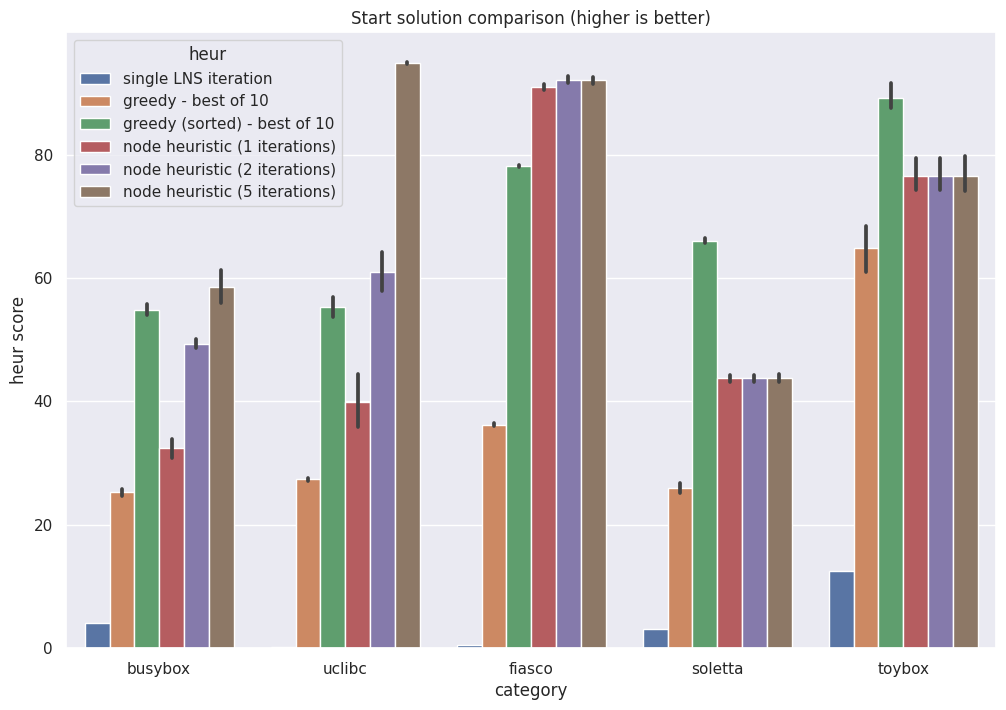

In [31]:
hue_order = [
    "single LNS iteration",
    # 'greedy',
    # 'greedy (sorted)',
    "greedy - best of 10",
    "greedy (sorted) - best of 10",
    "node heuristic (1 iterations)",
    "node heuristic (2 iterations)",
    "node heuristic (5 iterations)",
]
fig = plt.figure()
# fig.set_dpi(100)
fig.set_size_inches(12, 8)
sns.barplot(
    data=data, x="category", y="heur score", hue="heur", hue_order=hue_order
).set_title("Start solution comparison (higher is better)")

plt.savefig("sol_score_bars.pdf", bbox_inches="tight")

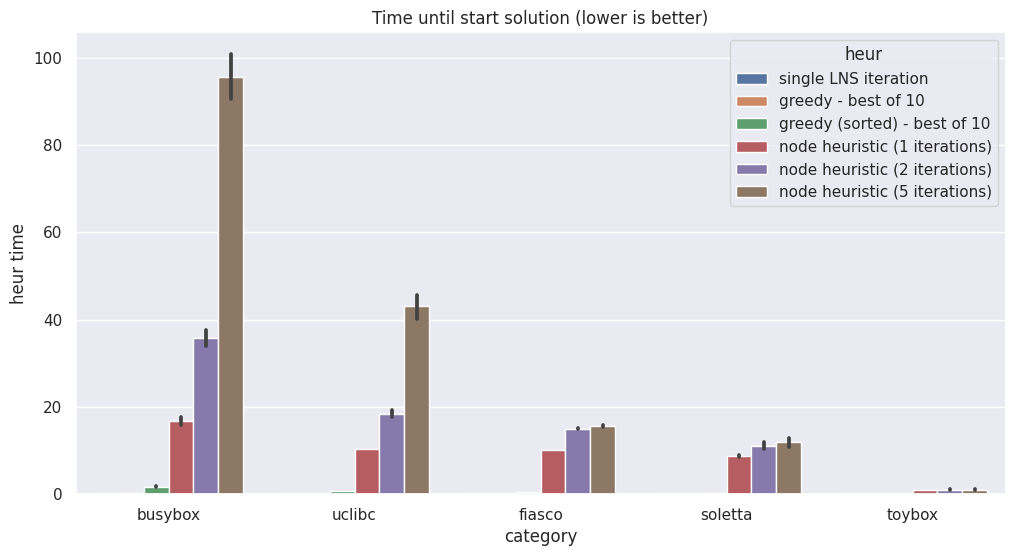

In [32]:
fig = plt.figure()
# fig.set_dpi(100)
fig.set_size_inches(12, 6)
sns.barplot(
    data=data, x="category", y="heur time", hue="heur", hue_order=hue_order
).set_title("Time until start solution (lower is better)")
# plt.yscale('log')
plt.savefig("sol_time_bars.pdf", bbox_inches="tight")

{'fiasco', 'busybox', 'uclibc', 'soletta'}
0 busybox
1 fiasco
2 soletta
3 uclibc


<Figure size 640x480 with 0 Axes>

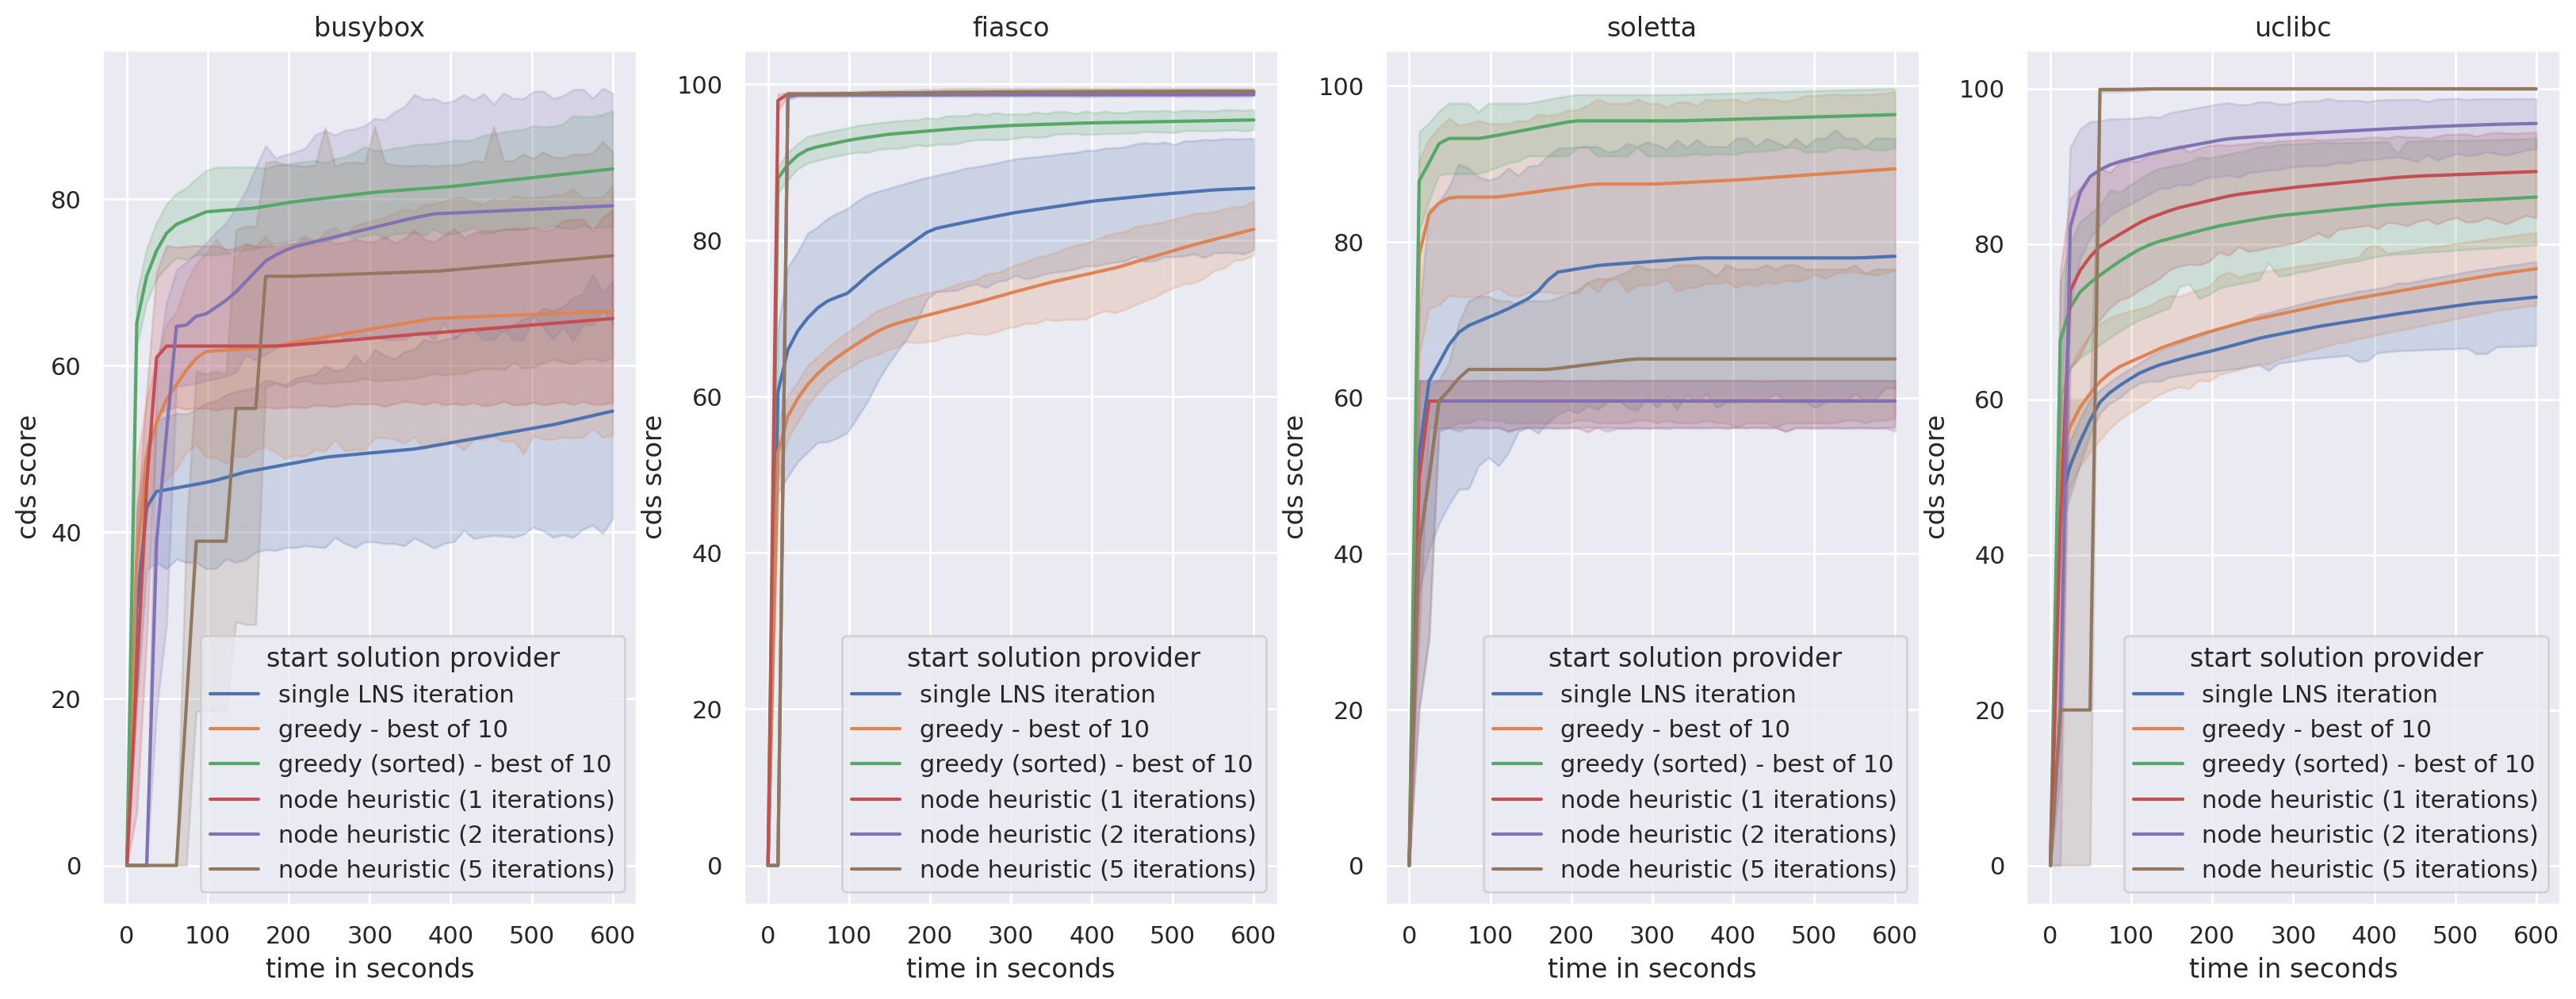

In [33]:
instances = set(data["instance"].map(lambda s: s.split("-")[0]).unique())
instances = instances - {"toybox"}
print(instances)

plt.cla()
plt.clf()
fig, ax = plt.subplots(1, len(instances))
fig.set_dpi(200)
fig.set_size_inches(len(instances) * 5, 7)

# print(json.dumps(interp_data))

for i, instance in enumerate(sorted(instances)):
    data_ = None
    datapoints = []
    for heur, l in interp_data[instance].items():
        for x, y in l:
            xn = list(np.linspace(0, 600, 50))
            # xn = [x_ for x_ in xn if x_ >= min(x)]
            y = np.interp(xn, x, y, left=0)
            for x_, y_ in zip(list(xn), list(y)):
                datapoints.append(
                    {
                        "time in seconds": x_,
                        "cds score": y_,
                        "start solution provider": heur,
                        "instance": instance,
                    }
                )
    data_ = pd.DataFrame(data=datapoints)
    print(i, instance)
    sns.lineplot(
        data=data_,
        ax=ax[i],
        x="time in seconds",
        y="cds score",
        hue="start solution provider",
        hue_order=hue_order,
    ).set_title(instance)

plt.savefig("cds_over_time_with_start_sol_comparison.pdf", bbox_inches="tight")

In [34]:
# molten_data = dict()

# for instance, data in datapoints.items():
#     df_o = pd.DataFrame(data)
#     molten_data[instance] = df_o.melt(["instance", "iteration", "force number of free edges"], var_name="variable", value_name="cds score")

In [35]:
# plt.cla()
# plt.clf()

# for instance, df in molten_data.items():
#     plt.cla()
#     plt.clf()
#     fig, ax = plt.subplots(2,1)
#     fig.set_dpi(200)
#     fig.set_size_inches(12, 10)

#     seaborn.lineplot(data=df, ax = ax[0], x="iteration", y="number of edges", style="variable", style_order=["global cds size", "cds size", "free edges"], hue="adaptive sequential fixing").set_title(instance)
#     seaborn.lineplot(data=df, ax = ax[1], x="iteration", y="number of edges", style="variable", style_order=["nbhd_time", "ip_time"], hue="adaptive sequential fixing")
#     plt.ylabel("time in seconds")
#     plt.savefig(f"{instance}_comparison.pdf", bbox_inches='tight')
#     print(instance)

In [36]:
# import zipfile

# INSTANCE_ZIP_PATH = "/home/gabriel/git/software-configuration-problem-cpp/instances/exported_instances.zip"
# def get_instance_archive() -> zipfile.ZipFile:
#     return zipfile.ZipFile(INSTANCE_ZIP_PATH, "r")


# def get_instance_names():
#     with get_instance_archive() as archive:
#         return [f.filename.split("/")[0] for f in archive.filelist if f.is_dir()]

# instances = get_instance_names()

# num_vertices = defaultdict(list)
# num_edges = defaultdict(list)
# with get_instance_archive() as archive:
#     for instance in instances:
#         n_concrete = int(
#             json.loads(archive.read(f"{instance}/index_instance.json"))["n_concrete"]
#         )
#         num_vertices[instance[:4]].append(n_concrete * 2)
#         conflicts = json.loads(archive.read(f"{instance}/conflicts.json"))["conflicts"]
#         num_edges[instance[:4]].append((n_concrete * 2)**2 - len(conflicts))
#         # # initial_sol = json.loads(archive.read(f"{instance}/initial.json"))["initial_mutually_exclusive_set"]
#         # assert type(conflicts) == list
#         # assert len(conflicts) > 0
#         # assert type(initial_sol) == list
#         # # assert len(initial_sol) > 0
#         # assert n_concrete > 0

# for key in num_vertices.keys():
#     l1 = num_vertices[key]
#     l2 = num_edges[key]

#     print(f"{key}: #nodes: min = {min(l1)}, max = {max(l1)}, avg = {sum(l1) / len(l1)}")
#     print(f"{key}: #edges: min = {min(l2)}, max = {max(l2)}, avg = {sum(l2) / len(l2)}")